In [188]:
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
from modules import etl
import seaborn as sbn
from scipy.stats.contingency import association
from sklearn.covariance import empirical_covariance, graphical_lasso, GraphicalLassoCV

In [189]:
data = pd.read_csv("data/data_project_metset.csv", sep=";", dtype_backend='pyarrow', engine='pyarrow')
codebook = pd.read_json("data/codebook.json", dtype_backend='pyarrow')
pa_string = pd.ArrowDtype(pa.string())
nan = [0, -66, -77, -99, '0', '-66', '-77', '-99']

In [190]:
etl = etl.Etl(codebook=codebook, data=data)

In [191]:
print(data.dtypes)
print('--------')
print(codebook.dtypes)


lfdn             int64[pyarrow]
external_lfdn    int64[pyarrow]
tester           int64[pyarrow]
dispcode         int64[pyarrow]
lastpage         int64[pyarrow]
                      ...      
rts7288986       int64[pyarrow]
rts7288987       int64[pyarrow]
rts7288988       int64[pyarrow]
rts7288989       int64[pyarrow]
rts7288990       int64[pyarrow]
Length: 283, dtype: object
--------
group_id         string[pyarrow]
main_question    string[pyarrow]
items                     object
options                   object
dtype: object


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 283 entries, lfdn to rts7288990
dtypes: int64[pyarrow](267), string[pyarrow](16)
memory usage: 2.5 MB


In [193]:
data.head(10)

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,rts7288979,rts7288980,rts7288981,rts7288982,rts7288983,rts7288986,rts7288987,rts7288988,rts7288989,rts7288990
0,5,0,0,31,7288991,-77,456,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,...,341,353,364,380,412,418,428,440,452,456
1,7,0,0,31,7288991,-77,1717,1199209,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,https://norstatsurveys.com/,...,1055,1100,1154,1218,1349,1412,1485,1615,1710,1717
2,8,0,0,31,7288991,-77,598,101222,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,-99,...,344,357,380,426,479,495,526,569,596,598
3,9,0,0,32,7288991,-77,-1,100212,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,https://norstatsurveys.com/,...,4023,4036,4081,4134,4206,4246,4300,4363,4394,4397
4,11,0,0,31,7288991,-77,1127,1184194,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,https://norstatsurveys.com/,...,542,562,623,687,823,909,1011,1096,1122,1127
5,12,0,0,31,7288991,-77,508,101828,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://norstatsurveys.com/,...,230,239,267,304,354,376,421,464,504,508
6,13,0,0,31,7288991,-77,1748,102939,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,https://norstatsurveys.com/,...,1200,1216,1275,1313,1452,1522,1664,1705,1745,1748
7,16,0,0,31,7288991,-77,1367,1193203,Mozilla/5.0 (Linux; Android 9; ANE-LX1) AppleW...,https://norstatsurveys.com/,...,907,942,987,1049,1142,1198,1253,1336,1362,1367
8,17,0,0,31,7288991,-77,732,1171181,Mozilla/5.0 (Linux; Android 12; M2101K7BNY) Ap...,https://norstatsurveys.com/,...,408,422,462,519,594,623,648,702,726,732
9,18,0,0,31,7288991,-77,886,103040,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,https://norstatsurveys.com/,...,528,549,591,641,707,746,810,866,883,886


In [194]:
df = data.copy()

In [195]:
# Drop rts - no encoding information
columns_to_drop = df.filter(regex=r'^rts\d+').columns

df = df.drop(columns=columns_to_drop)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 260 entries, lfdn to v_2920
dtypes: int64[pyarrow](244), string[pyarrow](16)
memory usage: 2.3 MB


In [197]:
df.head(10)

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,0,0,31,7288991,-77,456,testJZ3,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://norstatsurveys.com/,...,5,2,4,4,1,5,3,5,3,test
1,7,0,0,31,7288991,-77,1717,1199209,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,https://norstatsurveys.com/,...,3,2,2,5,2,1,3,3,2,-99
2,8,0,0,31,7288991,-77,598,101222,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,-99,...,5,3,1,4,3,2,1,3,3,-99
3,9,0,0,32,7288991,-77,-1,100212,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,https://norstatsurveys.com/,...,3,1,1,5,4,1,1,4,2,-99
4,11,0,0,31,7288991,-77,1127,1184194,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,https://norstatsurveys.com/,...,5,2,2,5,4,2,1,4,1,-99
5,12,0,0,31,7288991,-77,508,101828,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://norstatsurveys.com/,...,5,2,1,5,5,2,1,4,1,-99
6,13,0,0,31,7288991,-77,1748,102939,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,https://norstatsurveys.com/,...,2,1,2,5,5,1,1,5,1,-99
7,16,0,0,31,7288991,-77,1367,1193203,Mozilla/5.0 (Linux; Android 9; ANE-LX1) AppleW...,https://norstatsurveys.com/,...,3,3,1,5,4,1,2,5,3,-99
8,17,0,0,31,7288991,-77,732,1171181,Mozilla/5.0 (Linux; Android 12; M2101K7BNY) Ap...,https://norstatsurveys.com/,...,3,3,2,3,3,2,2,4,2,-99
9,18,0,0,31,7288991,-77,886,103040,Mozilla/5.0 (iPhone; CPU iPhone OS 16_0 like M...,https://norstatsurveys.com/,...,4,1,1,5,5,1,1,5,1,-99


In [198]:
df.lastpage.agg([
    'nunique'
])

nunique    1
Name: lastpage, dtype: int64

In [199]:
df.agg([
    'nunique'
])

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,p_0001,browser,referer,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
nunique,960,1,1,2,1,1,702,957,482,23,...,5,5,5,5,5,5,5,5,5,120


In [200]:
# Drop columns with single realization
cols_to_drop = df.columns[df.nunique() == 1]
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['external_lfdn', 'tester', 'lastpage', 'quality', 'device_type', 'quota_rejected_id', 'output_mode', 'javascript', 'flash', 'language', 'cleaned', 'date_of_first_mail', 'v_2889', 'v_2890', 'v_2891', 'v_2892', 'v_1754']


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Columns: 243 entries, lfdn to v_2920
dtypes: int64[pyarrow](228), string[pyarrow](15)
memory usage: 2.2 MB


In [202]:
# Replace coded missing values with NA
df = df.replace(nan, pd.NA)

In [203]:
df.isna().sum()

lfdn          0
dispcode      0
duration      0
p_0001        0
browser       0
           ... 
v_1662        0
v_1663        0
v_1664        0
v_1665        0
v_2920      810
Length: 243, dtype: int64

In [204]:
items = etl.get_items()

In [205]:
df.dtypes



lfdn         int64[pyarrow]
dispcode     int64[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662       int64[pyarrow]
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [206]:
df['lfdn'].max()
df['lfdn'] = df['lfdn'].astype('uint16[pyarrow]')
df.dtypes

lfdn        uint16[pyarrow]
dispcode     int64[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662       int64[pyarrow]
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [207]:
etl.get_item_options('v_1662')
df['v_1662'] = df['v_1662'].astype('category').cat.as_ordered()


In [208]:
df['dispcode'] = df['dispcode'].astype('uint8[pyarrow]')
df.dtypes

lfdn        uint16[pyarrow]
dispcode     uint8[pyarrow]
duration     int64[pyarrow]
p_0001      string[pyarrow]
browser     string[pyarrow]
                 ...       
v_1662             category
v_1663       int64[pyarrow]
v_1664       int64[pyarrow]
v_1665       int64[pyarrow]
v_2920      string[pyarrow]
Length: 243, dtype: object

In [209]:
df['duration'] = data['duration']

In [210]:
df['duration'] = pd.to_timedelta(df['duration'], unit='s').astype('duration[s][pyarrow]')

In [211]:
df.drop(columns=['p_0001', 'page_history', 'session_id', 'dispcode', 'referer', 'hflip', 'vflip'])

,lfdn,duration,browser,quota,quota_assignment,ats,datetime,date_of_last_access,v_1752,v_1751,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,5,0 days 00:07:36,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,1,"1,4,5",1676287857,13.02.2023 11:30,13.02.2023 11:38,2,27,...,5,2,4,4,1,5,3,5,3,test
1,7,0 days 00:28:37,Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...,2,"2,6,4",1676289727,13.02.2023 12:02,13.02.2023 12:30,2,30,...,3,2,2,5,2,1,3,3,2,<NA>
2,8,0 days 00:09:58,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,2,"2,7,4",1676290139,13.02.2023 12:08,13.02.2023 12:18,2,48,...,5,3,1,4,3,2,1,3,3,<NA>
3,9,-1 days +23:59:59,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...,7,"7,1,4",1676290395,13.02.2023 12:13,13.02.2023 13:26,2,44,...,3,1,1,5,4,1,1,4,2,<NA>
4,11,0 days 00:18:47,Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...,3,"3,6,2",1676290922,13.02.2023 12:22,13.02.2023 12:40,1,34,...,5,2,2,5,4,2,1,4,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1897,0 days 00:24:13,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A52...,6,"6,3,2",1677092281,22.02.2023 18:58,22.02.2023 19:22,1,39,...,4,1,1,1,3,2,1,5,1,<NA>
956,1916,0 days 00:16:31,Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like...,6,"6,4,2",1677095348,22.02.2023 19:49,22.02.2023 20:05,2,39,...,3,3,3,2,3,3,3,2,3,<NA>
957,1968,0 days 00:11:34,Mozilla/5.0 (Linux; Android 10; LM-G710) Apple...,6,"6,4,2",1677107296,22.02.2023 23:08,22.02.2023 23:19,2,37,...,4,2,1,5,4,2,4,5,1,<NA>
958,2034,0 days 00:46:27,Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...,6,"6,4,2",1677146879,23.02.2023 10:07,23.02.2023 10:54,2,37,...,5,1,1,5,4,3,4,3,2,"Danke für diese Umfrage, war sehr toll und int..."


In [212]:
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True).astype('timestamp[s][pyarrow]')
df['datetime']

0      2023-02-13 11:30:00
1      2023-02-13 12:02:00
2      2023-02-13 12:08:00
3      2023-02-13 12:13:00
4      2023-02-13 12:22:00
              ...         
955    2023-02-22 18:58:00
956    2023-02-22 19:49:00
957    2023-02-22 23:08:00
958    2023-02-23 10:07:00
959    2023-02-23 11:20:00
Name: datetime, Length: 960, dtype: timestamp[s][pyarrow]

In [213]:
df['date_of_last_access'] = pd.to_datetime(df['date_of_last_access'], dayfirst=True).astype('timestamp[s][pyarrow]')
df['date_of_last_access']

0      2023-02-13 11:38:00
1      2023-02-13 12:30:00
2      2023-02-13 12:18:00
3      2023-02-13 13:26:00
4      2023-02-13 12:40:00
              ...         
955    2023-02-22 19:22:00
956    2023-02-22 20:05:00
957    2023-02-22 23:19:00
958    2023-02-23 10:54:00
959    2023-02-23 11:33:00
Name: date_of_last_access, Length: 960, dtype: timestamp[s][pyarrow]

In [214]:
df.columns

Index(['lfdn', 'dispcode', 'duration', 'p_0001', 'browser', 'referer', 'quota',
       'quota_assignment', 'page_history', 'hflip',
       ...
       'v_2933', 'v_1658', 'v_1659', 'v_1660', 'v_1661', 'v_1662', 'v_1663',
       'v_1664', 'v_1665', 'v_2920'],
      dtype='object', length=243)

In [215]:
df = df.replace([0, -66, -77, -99, '0', '-66', '-77', '-99'], pd.NA)

In [216]:
df.columns.to_list()

['lfdn',
 'dispcode',
 'duration',
 'p_0001',
 'browser',
 'referer',
 'quota',
 'quota_assignment',
 'page_history',
 'hflip',
 'vflip',
 'session_id',
 'ats',
 'datetime',
 'date_of_last_access',
 'v_1752',
 'v_1751',
 'v_1749',
 'v_1750',
 'v_1747',
 'v_1748',
 'v_1753',
 'v_1762',
 'v_2937',
 'v_2938',
 'dupl1_v_69',
 'v_71',
 'v_2851',
 'v_2852',
 'v_2853',
 'v_2854',
 'v_2855',
 'v_2856',
 'v_1709',
 'v_1710',
 'v_1711',
 'v_1712',
 'v_1713',
 'v_1714',
 'v_1715',
 'v_1717',
 'v_1718',
 'v_1720',
 'v_1722',
 'v_1724',
 'v_1726',
 'v_1728',
 'v_1730',
 'v_1732',
 'v_1734',
 'v_1707',
 'v_1719',
 'v_2894',
 'v_2895',
 'v_2896',
 'v_2897',
 'v_2898',
 'v_2899',
 'v_2900',
 'v_2901',
 'v_2902',
 'v_2903',
 'v_2904',
 'v_2905',
 'v_2906',
 'v_2907',
 'v_2908',
 'v_2909',
 'v_2910',
 'v_2911',
 'v_2918',
 'v_2702',
 'v_2703',
 'v_2704',
 'v_2705',
 'v_2706',
 'v_2707',
 'v_2708',
 'v_2709',
 'v_2710',
 'v_2711',
 'v_2712',
 'v_2713',
 'v_2714',
 'v_2715',
 'v_2716',
 'v_2717',
 'v_2718

In [217]:
df['browser'] = df['browser'].astype(pa_string)
df['browser']

0      Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...
1      Mozilla/5.0 (Linux; Android 13; SM-G998B) Appl...
2      Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...
3      Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-G99...
4      Mozilla/5.0 (Linux; Android 11; SAMSUNG SM-A32...
                             ...                        
955    Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A52...
956    Mozilla/5.0 (iPhone; CPU iPhone OS 16_3_1 like...
957    Mozilla/5.0 (Linux; Android 10; LM-G710) Apple...
958    Mozilla/5.0 (iPad; CPU OS 15_4 like Mac OS X) ...
959    Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
Name: browser, Length: 960, dtype: string[pyarrow]

In [218]:
etl.get_item_options('v_1752')
df['v_1752'] = df['v_1752'].astype('category')
df['v_1752']

0      2
1      2
2      2
3      2
4      1
      ..
955    1
956    2
957    2
958    2
959    2
Name: v_1752, Length: 960, dtype: category
Categories (3, int64[pyarrow]): [1, 2, 4]

In [219]:
nominal_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'nominal':
        nominal_q.append(item)
nominal_q


['v_1752',
 'v_1753',
 'v_1747',
 'v_1762',
 'v_2937',
 'v_1709',
 'v_1710',
 'v_1711',
 'v_1712',
 'v_1713',
 'v_1714',
 'v_1715',
 'v_1717',
 'v_1718',
 'v_1720',
 'v_1722',
 'v_1724',
 'v_1726',
 'v_1728',
 'v_1730',
 'v_1732',
 'v_1734',
 'v_2936']

In [220]:
ordinal_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'ordinal':
        ordinal_q.append(item)

ordinal_q

['v_1749',
 'v_2851',
 'v_2852',
 'v_2853',
 'v_2854',
 'v_2855',
 'v_2856',
 'v_2894',
 'v_2895',
 'v_2896',
 'v_2897',
 'v_2898',
 'v_2899',
 'v_2900',
 'v_2901',
 'v_2902',
 'v_2903',
 'v_2904',
 'v_2905',
 'v_2906',
 'v_2907',
 'v_2908',
 'v_2909',
 'v_2910',
 'v_2702',
 'v_2703',
 'v_2704',
 'v_2705',
 'v_2706',
 'v_2707',
 'v_2708',
 'v_2709',
 'v_2710',
 'v_2711',
 'v_2712',
 'v_2713',
 'v_2714',
 'v_2715',
 'v_2716',
 'v_2717',
 'v_2718',
 'v_2756',
 'v_2757',
 'v_2758',
 'v_2759',
 'v_2760',
 'v_2761',
 'v_2762',
 'v_2763',
 'v_2764',
 'v_2765',
 'v_2766',
 'v_2767',
 'v_2768',
 'v_2769',
 'v_2770',
 'v_2771',
 'v_2772',
 'v_2720',
 'v_2721',
 'v_2722',
 'v_2723',
 'v_2724',
 'v_2725',
 'v_2726',
 'v_2727',
 'v_2728',
 'v_2729',
 'v_2730',
 'v_2731',
 'v_2732',
 'v_2733',
 'v_2734',
 'v_2735',
 'v_2736',
 'v_2738',
 'v_2739',
 'v_2740',
 'v_2741',
 'v_2742',
 'v_2743',
 'v_2744',
 'v_2745',
 'v_2746',
 'v_2747',
 'v_2748',
 'v_2749',
 'v_2750',
 'v_2751',
 'v_2752',
 'v_2753',

In [221]:
metric_q = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'metric':
        metric_q.append(item)

metric_q

['v_1751', 'dupl1_v_69']

In [222]:
df[nominal_q] = df[nominal_q].astype('category')

In [223]:
df[nominal_q].dtypes

v_1752    category
v_1753    category
v_1747    category
v_1762    category
v_2937    category
v_1709    category
v_1710    category
v_1711    category
v_1712    category
v_1713    category
v_1714    category
v_1715    category
v_1717    category
v_1718    category
v_1720    category
v_1722    category
v_1724    category
v_1726    category
v_1728    category
v_1730    category
v_1732    category
v_1734    category
v_2936    category
dtype: object

In [224]:
df1 = df.copy()

In [225]:
ordinal_q.remove('v_1754')

'v_1754' in ordinal_q

False

In [226]:
df1[ordinal_q] = df1[ordinal_q].astype('category')

In [227]:
for col in ordinal_q:
    if col in df1.columns:
        df1[col] = df1[col].cat.as_ordered()

In [228]:
df1[ordinal_q].dtypes

v_1749    category
v_2851    category
v_2852    category
v_2853    category
v_2854    category
            ...   
v_1646    category
v_1647    category
v_2931    category
v_2932    category
v_2933    category
Length: 187, dtype: object

In [229]:
free_text = []
for item in etl.get_items():
    if etl.get_item_type(item) == 'free_text':
        free_text.append(item)
free_text

['v_2920',
 'v_1750',
 'v_1748',
 'v_2938',
 'v_1707',
 'v_1719',
 'v_2911',
 'v_2918',
 'v_2719',
 'v_2773',
 'v_2737',
 'v_2755',
 'v_2799',
 'v_2809',
 'v_2919']

In [230]:
df1[free_text] = df1[free_text].astype(pa_string)

In [231]:
df1[free_text].dtypes

v_2920    string[pyarrow]
v_1750    string[pyarrow]
v_1748    string[pyarrow]
v_2938    string[pyarrow]
v_1707    string[pyarrow]
v_1719    string[pyarrow]
v_2911    string[pyarrow]
v_2918    string[pyarrow]
v_2719    string[pyarrow]
v_2773    string[pyarrow]
v_2737    string[pyarrow]
v_2755    string[pyarrow]
v_2799    string[pyarrow]
v_2809    string[pyarrow]
v_2919    string[pyarrow]
dtype: object

In [232]:
df[metric_q].dtypes

v_1751        int64[pyarrow]
dupl1_v_69    int64[pyarrow]
dtype: object

In [233]:
df[['v_1751', 'dupl1_v_69']].max()

v_1751        60
dupl1_v_69     9
dtype: int64[pyarrow]

In [234]:
df[['v_1751', 'dupl1_v_69']].min()

v_1751        18
dupl1_v_69     1
dtype: int64[pyarrow]

In [235]:
np.iinfo('uint8')

iinfo(min=0, max=255, dtype=uint8)

In [236]:
df1[metric_q] = df[metric_q].astype('uint8[pyarrow]')

In [237]:
df1[metric_q].dtypes

v_1751        uint8[pyarrow]
dupl1_v_69    uint8[pyarrow]
dtype: object

In [238]:
print(list(df1.dtypes))

[uint16[pyarrow], uint8[pyarrow], duration[s][pyarrow], string[pyarrow], string[pyarrow], string[pyarrow], int64[pyarrow], string[pyarrow], string[pyarrow], int64[pyarrow], int64[pyarrow], string[pyarrow], int64[pyarrow], timestamp[s][pyarrow], timestamp[s][pyarrow], CategoricalDtype(categories=[1, 2, 4], ordered=False, categories_dtype=int64[pyarrow]), uint8[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True, categories_dtype=int64[pyarrow]), string[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False, categories_dtype=int64[pyarrow]), string[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3], ordered=False, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 6], ordered=False, categories_dtype=int64[pyarrow]), string[pyarrow], uint8[pyarrow], int64[pyarrow], CategoricalDtype(categories=[1, 2, 3, 4, 5], ord

In [239]:
print(list(df1[ordinal_q].dtypes))

[CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 11, 12], ordered=True, categories_dtype=int64[pyarrow]), CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True, categories_dtype=int64[pyarrow]),

In [240]:
df1.to_parquet('data/data_cleaned.parquet')

In [241]:
cat_code_df = df1.select_dtypes('category').apply(lambda x: x.cat.codes)

In [242]:
cat_code_df_np = cat_code_df.to_numpy()

In [243]:
cat_code_df.isna().sum()

v_1752    0
v_1749    0
v_1747    0
v_1753    0
v_1762    0
         ..
v_1661    0
v_1662    0
v_1663    0
v_1664    0
v_1665    0
Length: 210, dtype: int64

In [244]:
etl.get_single_item('v_1762')

[{'label': 'Wohnform',
  'type': 'nominal',
  'options': {'1': 'Hauseigentum',
   '2': 'Wohnungseigentum',
   '3': 'Miete (Haus, Wohnung, inkl. Mietkauf)'}}]

<Axes: >

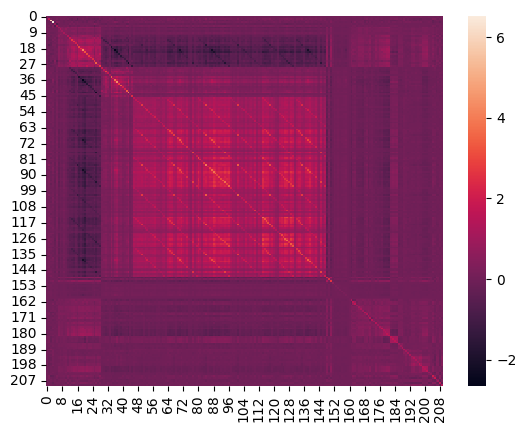

In [245]:
sbn.heatmap(empirical_covariance(cat_code_df))

In [246]:
emp_cov = empirical_covariance(cat_code_df_np.astype(float))
graphical_lasso(emp_cov, alpha=0.8)

/home/tho/Desktop/Campus02/03_statistik/ws25_statistik/.venv/lib/python3.11/site-packages/sklearn/covariance/_graph_lasso.py:199: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.287e-01
  warnings.warn(


(array([[0.26457357, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.58485677, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 5.63784722, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 1.03920898, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 1.73203016,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.39548177]], shape=(210, 210)),
 array([[ 3.77966706,  0.        ,  0.        , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.        ,  0.63097184, -0.        , ..., -0.        ,
         -0.        ,  0.        ],
        [ 0.        , -0.        ,  0.17737267, ..., -0.        ,
          0.        , -0.        ],
        ...,
        [-0.        , -0.        , -0.        , ...,  0.96227036,
      

In [247]:
GCV = GraphicalLassoCV()

In [250]:
GCV.fit(cat_code_df_np.astype(float))
cov = GCV.covariance_

/home/tho/Desktop/Campus02/03_statistik/ws25_statistik/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:188: RuntimeWarning: invalid value encountered in subtract
  x = um.subtract(arr, arrmean, out=...)
/home/tho/Desktop/Campus02/03_statistik/ws25_statistik/.venv/lib/python3.11/site-packages/sklearn/covariance/_graph_lasso.py:199: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 1.100e-01
  warnings.warn(


<Axes: >

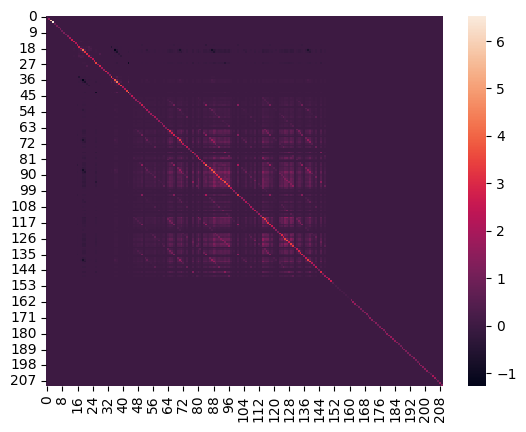

In [251]:
sbn.heatmap(cov)

In [259]:
cov = df1.select_dtypes('category').cov()

In [261]:
cov = cov.abs() > 0.5

In [263]:
df1[cov]

,lfdn,dispcode,duration,p_0001,browser,referer,quota,quota_assignment,page_history,hflip,...,v_2933,v_1658,v_1659,v_1660,v_1661,v_1662,v_1663,v_1664,v_1665,v_2920
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
956,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
957,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
958,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
